<a href="https://colab.research.google.com/github/harshit4311/noisy-russell-dataset-analysis/blob/main/noisy_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hi')

hi


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/growth_value_cumulative_returns_corrected.csv')
df

,Date,growth_cumulative_ret,value_cumulative_ret
0,2020-01-03,0.992767,0.993286
1,2020-01-06,0.999103,0.994162
2,2020-01-07,0.997028,0.991170
3,2020-01-08,1.005271,0.993286
4,2020-01-09,1.013513,0.997665
...,...,...,...
1252,2024-12-24,2.419971,1.517273
1253,2024-12-26,2.416371,1.519864
1254,2024-12-27,2.381355,1.510389
1255,2024-12-30,2.352959,1.495326


In [ ]:
print(df.shape)

(1257, 3)


In [ ]:
print(df.head())

         Date  growth_cumulative_ret  value_cumulative_ret
0  2020-01-03               0.992767              0.993286
1  2020-01-06               0.999103              0.994162
2  2020-01-07               0.997028              0.991170
3  2020-01-08               1.005271              0.993286
4  2020-01-09               1.013513              0.997665


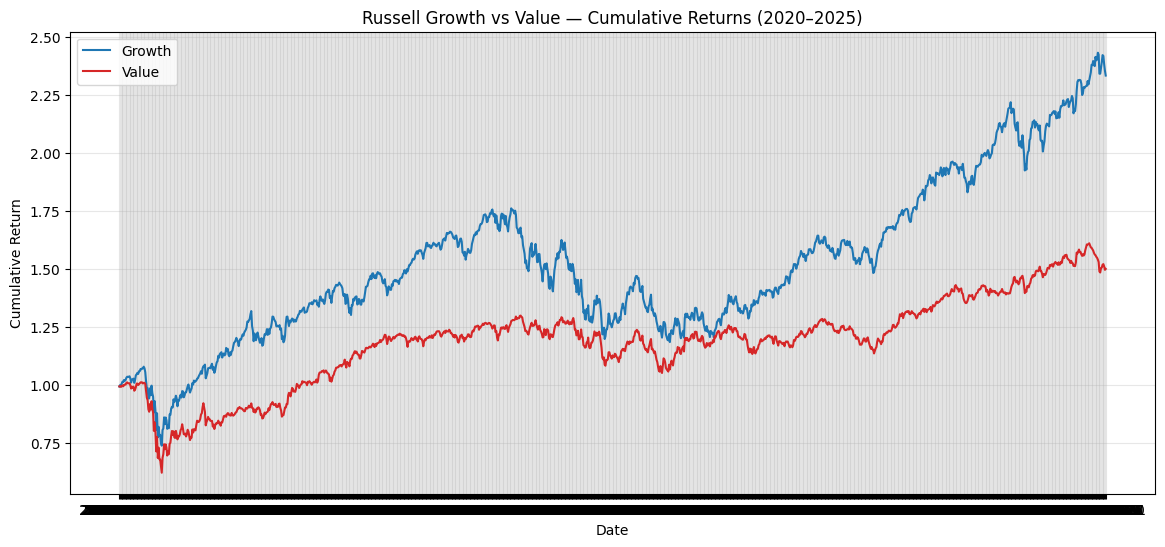

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['growth_cumulative_ret'], label='Growth', color='tab:blue')
plt.plot(df['Date'], df['value_cumulative_ret'], label='Value', color='tab:red')
plt.title("Russell Growth vs Value — Cumulative Returns (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


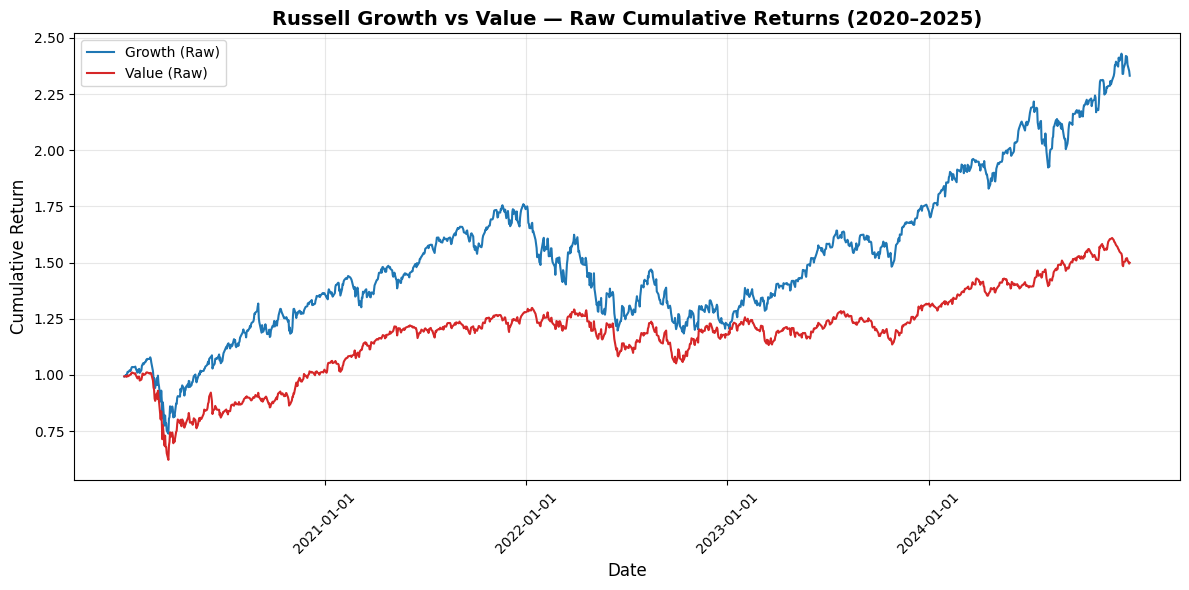

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Load the noisy raw dataset
# ----------------------------------------------------
file_path = "/content/growth_value_cumulative_returns_corrected.csv"
raw = pd.read_csv(file_path)

# ----------------------------------------------------
# Clean and prepare date column
# ----------------------------------------------------
# Extract first 10 characters (YYYY-MM-DD) and convert to datetime
raw['Date'] = pd.to_datetime(raw['Date'].astype(str).str[:10])

# Rename columns for consistency
raw.rename(columns={
    'growth_cumulative_ret': 'Growth',
    'value_cumulative_ret': 'Value'
}, inplace=True)

# ----------------------------------------------------
# Create the time-series plot
# ----------------------------------------------------
plt.figure(figsize=(12, 6))

plt.plot(raw['Date'], raw['Growth'], label='Growth (Raw)', color='tab:blue', linewidth=1.5)
plt.plot(raw['Date'], raw['Value'], label='Value (Raw)', color='tab:red', linewidth=1.5)

# ----------------------------------------------------
# Styling and aesthetics
# ----------------------------------------------------
plt.title("Russell Growth vs Value — Raw Cumulative Returns (2020–2025)", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Optional: yearly ticks for clarity
years = pd.date_range(raw['Date'].min(), raw['Date'].max(), freq='YS')
plt.xticks(years)

plt.tight_layout()

# ----------------------------------------------------
# Save the plot
# ----------------------------------------------------
# plt.savefig("raw_russell_indices_plot.png", dpi=300, bbox_inches='tight')

plt.show()


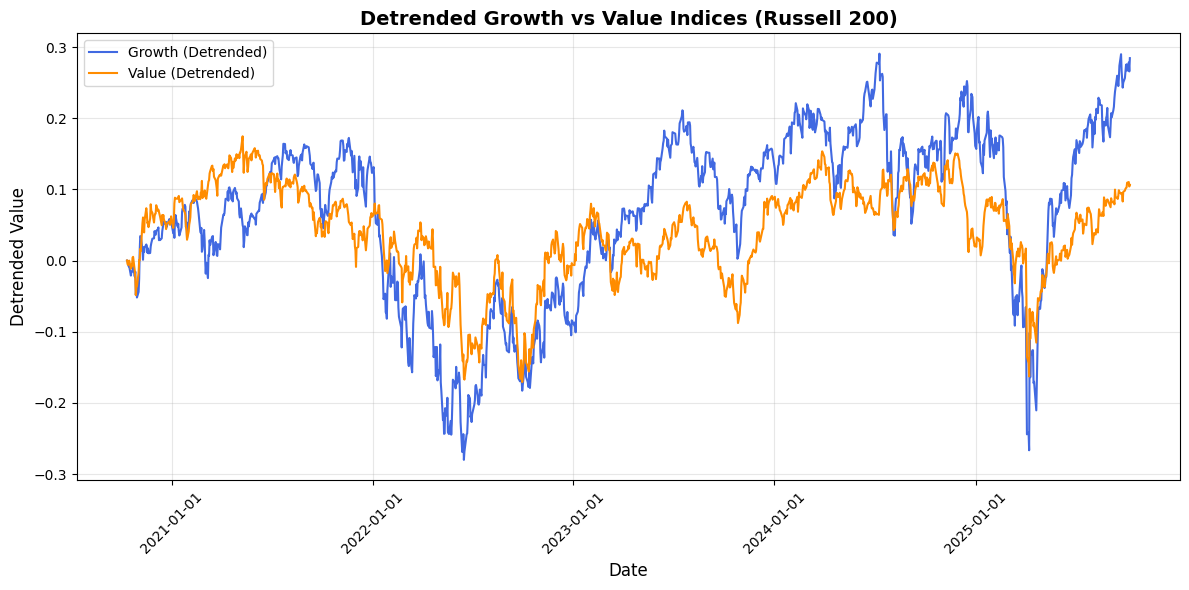

In [ ]:
# ----------------------------------------------------
# Import necessary libraries
# ----------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# ----------------------------------------------------
# Load the dataset
# ----------------------------------------------------
file_path = "/content/detrended_200_russell_indices.csv"
df = pd.read_csv(file_path)

# ----------------------------------------------------
# Clean and prepare date column
# ----------------------------------------------------
# Extract the first 10 characters (YYYY-MM-DD) and convert to datetime
df['date'] = pd.to_datetime(df['date'].str[:10])

# ----------------------------------------------------
# Create the time-series plot
# ----------------------------------------------------
plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['Growth_detrended'], label='Growth (Detrended)', color='royalblue', linewidth=1.5)
plt.plot(df['date'], df['Value_detrended'], label='Value (Detrended)', color='darkorange', linewidth=1.5)

# ----------------------------------------------------
# Styling and aesthetics
# ----------------------------------------------------
plt.title("Detrended Growth vs Value Indices (Russell 200)", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Detrended Value", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Optional: yearly ticks for clarity
years = pd.date_range(df['date'].min(), df['date'].max(), freq='YS')
plt.xticks(years)

plt.tight_layout()

# ----------------------------------------------------
# Save the plot
# ----------------------------------------------------
plt.savefig("detrended_russell_indices_plot.png", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
print("Raw dataset:")
print(raw['Growth'].min(), raw['Growth'].max())

print("Detrended dataset:")
print(df['Growth_detrended'].min(), df['Growth_detrended'].max())


Raw dataset:
0.738043217446945 2.430272119725567
Detrended dataset:
-0.2801178984398855 0.290726016270965


In [ ]:
# Check all column names
print(df.columns)


Index(['date', 'Growth_detrended', 'Value_detrended'], dtype='object')


In [ ]:
# Check mean
print("Mean of Growth_detrended:", df['Growth_detrended'].mean())
print("Mean of Value_detrended:", df['Value_detrended'].mean())


Mean of Growth_detrended: 0.06680705793207659
Mean of Value_detrended: 0.040751125934451744


In [ ]:
# Center the series
df['Growth_centered'] = df['Growth_detrended'] - df['Growth_detrended'].mean()
df['Value_centered']  = df['Value_detrended']  - df['Value_detrended'].mean()

# Verify
print("Mean of Growth_centered:", df['Growth_centered'].mean())
print("Mean of Value_centered:", df['Value_centered'].mean())


Mean of Growth_centered: 5.661695105658169e-18
Mean of Value_centered: 6.36940699386544e-18


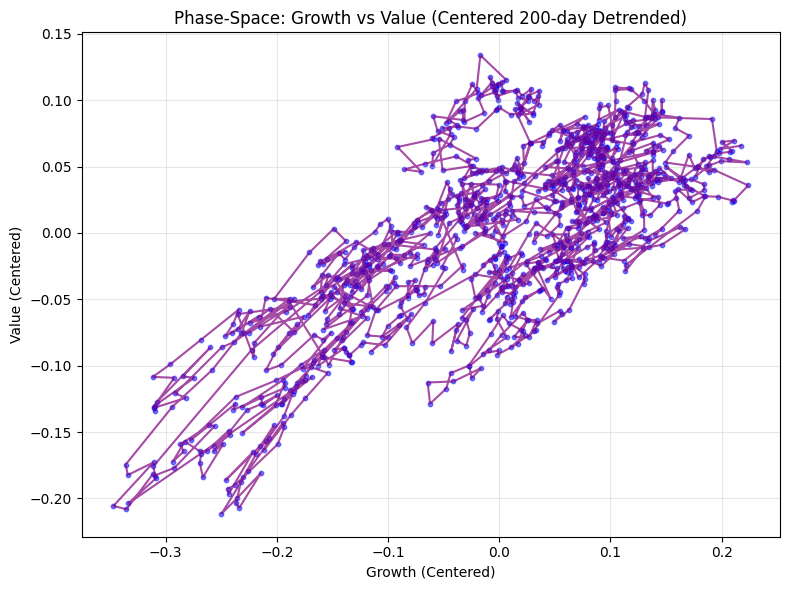

In [ ]:
import matplotlib.pyplot as plt

# Phase-space plot: Growth_centered vs Value_centered
plt.figure(figsize=(8, 6))
plt.plot(df['Growth_centered'], df['Value_centered'], color='purple', alpha=0.7, linewidth=1.5)
plt.scatter(df['Growth_centered'], df['Value_centered'], color='blue', s=10, alpha=0.5)

plt.title("Phase-Space: Growth vs Value (Centered 200-day Detrended)")
plt.xlabel("Growth (Centered)")
plt.ylabel("Value (Centered)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


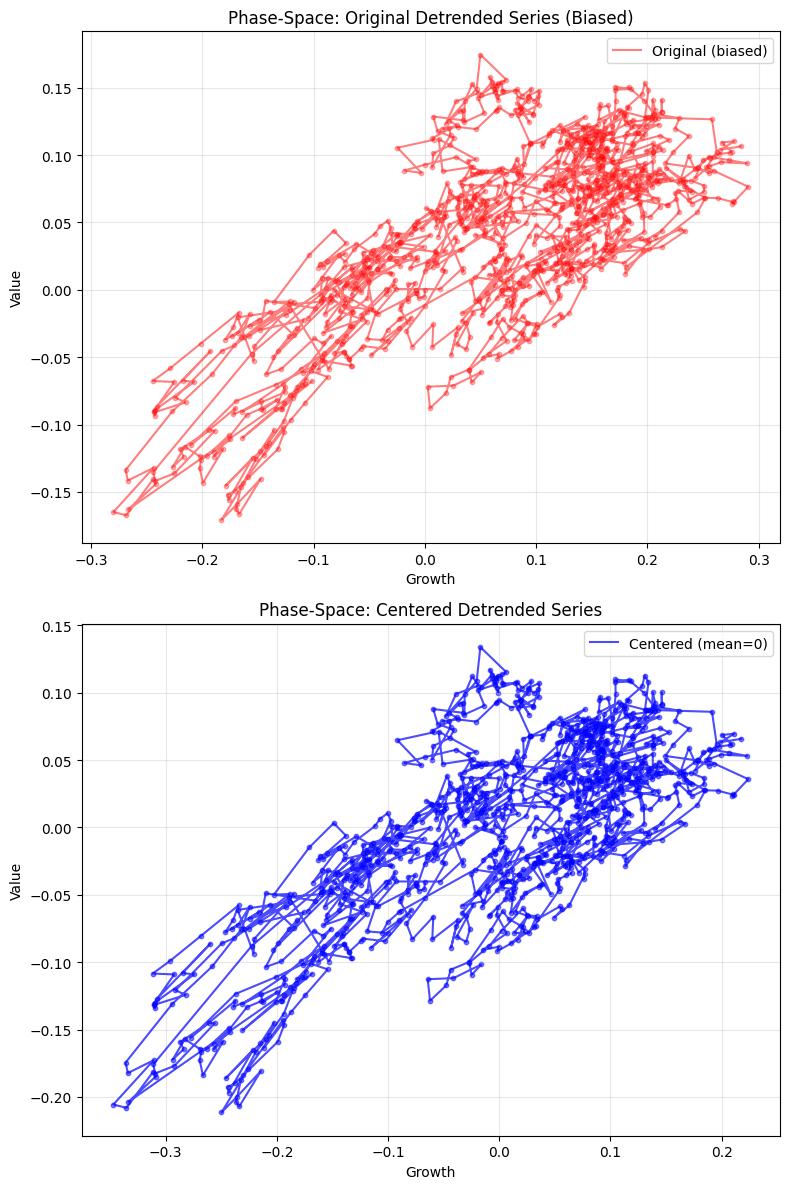

In [ ]:
import matplotlib.pyplot as plt

# Original (biased) series
G_orig = df['Growth_detrended']
V_orig = df['Value_detrended']

# Centered series
G_centered = df['Growth_centered']
V_centered = df['Value_centered']

# Create two subplots (vertical layout)
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # 2 rows, 1 column

# -------------------------
# Plot 1: Original (biased)
# -------------------------
axes[0].plot(G_orig, V_orig, color='red', alpha=0.5, linewidth=1.5, label='Original (biased)')
axes[0].scatter(G_orig, V_orig, color='red', s=10, alpha=0.3)
axes[0].set_title("Phase-Space: Original Detrended Series (Biased)")
axes[0].set_xlabel("Growth")
axes[0].set_ylabel("Value")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# -------------------------
# Plot 2: Centered (mean=0)
# -------------------------
axes[1].plot(G_centered, V_centered, color='blue', alpha=0.7, linewidth=1.5, label='Centered (mean=0)')
axes[1].scatter(G_centered, V_centered, color='blue', s=10, alpha=0.5)
axes[1].set_title("Phase-Space: Centered Detrended Series")
axes[1].set_xlabel("Growth")
axes[1].set_ylabel("Value")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


## Take just 200 data points from the Raw Russell Indices Dataset

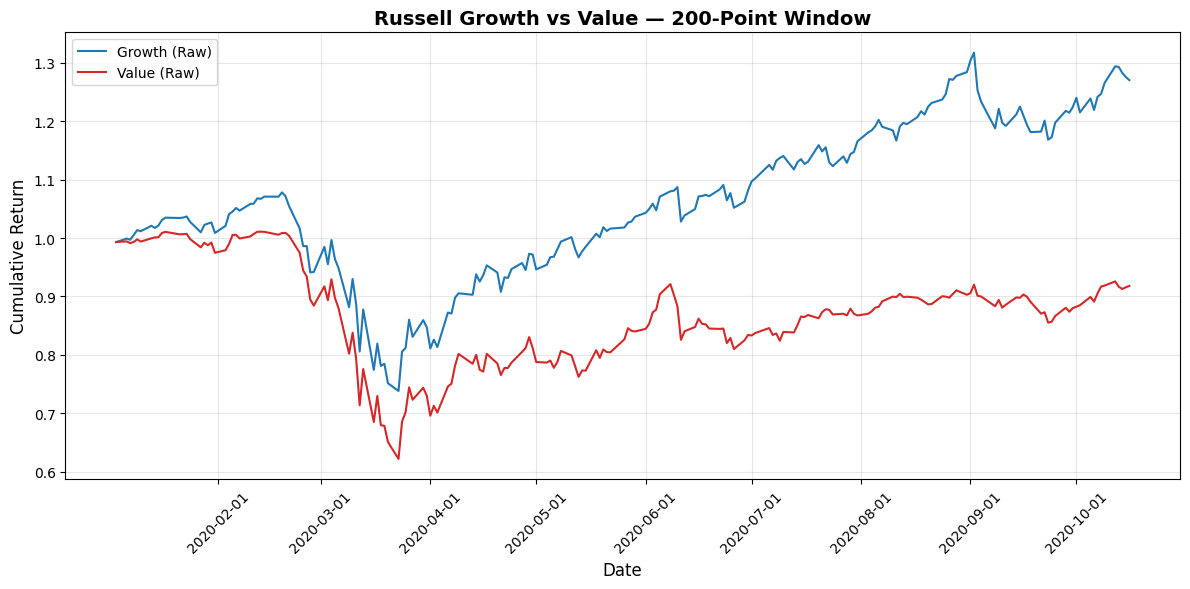

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Load the noisy raw dataset
# ----------------------------------------------------
file_path = "/content/growth_value_cumulative_returns_corrected.csv"
raw = pd.read_csv(file_path)

# Clean and prepare date column
raw['Date'] = pd.to_datetime(raw['Date'].astype(str).str[:10])

# Rename columns for consistency
raw.rename(columns={
    'growth_cumulative_ret': 'Growth',
    'value_cumulative_ret': 'Value'
}, inplace=True)

# ----------------------------------------------------
# Select 200-point window
# ----------------------------------------------------
# Option 1: first 200 points
window = raw.iloc[:200].copy()

# Option 2: any 200-point slice, e.g., starting at index 500
# start_idx = 500
# window = raw.iloc[start_idx:start_idx+200].copy()

# ----------------------------------------------------
# Plot the 200-point window
# ----------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(window['Date'], window['Growth'], label='Growth (Raw)', color='tab:blue', linewidth=1.5)
plt.plot(window['Date'], window['Value'], label='Value (Raw)', color='tab:red', linewidth=1.5)

plt.title("Russell Growth vs Value — 200-Point Window", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Optional: monthly ticks for clarity
months = pd.date_range(window['Date'].min(), window['Date'].max(), freq='MS')
plt.xticks(months)

plt.tight_layout()
plt.savefig("raw_russell_200pt_window.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
raw.shape

(1257, 3)

In [ ]:
# Take first 200 points
window = raw.iloc[:200].copy()

# Check the shape
window.shape


(200, 3)

In [ ]:
# -------------------------------
# Prepare the 200-point dataset
# -------------------------------
# Keep original column names
window_dataset = window.copy()
window_dataset.rename(columns={
    'Growth': 'growth_cumulative_ret',
    'Value': 'value_cumulative_ret'
}, inplace=True)

# -------------------------------
# Save to CSV
# -------------------------------
window_dataset.to_csv("russell_200pt_window.csv", index=False)
print("✅ 200-point window dataset saved as 'russell_200pt_window.csv'")


✅ 200-point window dataset saved as 'russell_200pt_window.csv'


In [ ]:
window_data = pd.read_csv('/content/russell_200pt_window.csv')
window_data

,Date,growth_cumulative_ret,value_cumulative_ret
0,2020-01-03,0.992767,0.993286
1,2020-01-06,0.999103,0.994162
2,2020-01-07,0.997028,0.991170
3,2020-01-08,1.005271,0.993286
4,2020-01-09,1.013513,0.997665
...,...,...,...
195,2020-10-12,1.294031,0.925720
196,2020-10-13,1.293127,0.916481
197,2020-10-14,1.282851,0.912682
198,2020-10-15,1.275850,0.915587


In [ ]:
window_data.shape

(200, 3)

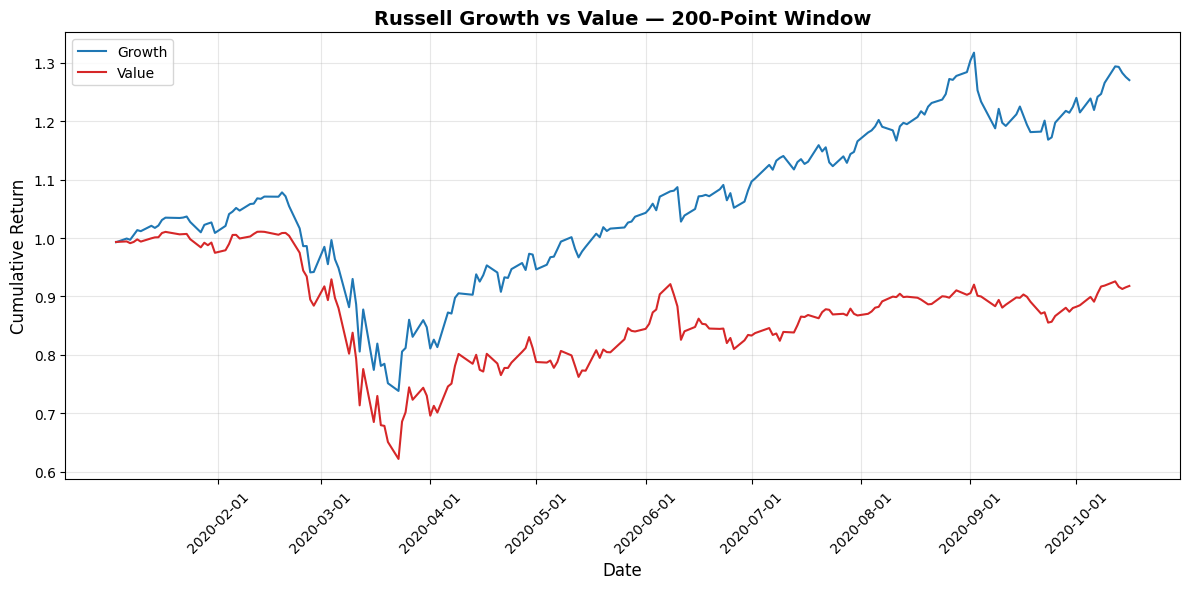

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load the 200-point window dataset
# -------------------------------
window_data = pd.read_csv('/content/russell_200pt_window.csv')

# Clean and prepare date column
window_data['Date'] = pd.to_datetime(window_data['Date'].astype(str).str[:10])

# -------------------------------
# Plot the time series
# -------------------------------
plt.figure(figsize=(12, 6))

plt.plot(window_data['Date'], window_data['growth_cumulative_ret'], label='Growth', color='tab:blue', linewidth=1.5)
plt.plot(window_data['Date'], window_data['value_cumulative_ret'], label='Value', color='tab:red', linewidth=1.5)

# -------------------------------
# Styling
# -------------------------------
plt.title("Russell Growth vs Value — 200-Point Window", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Optional: monthly ticks for clarity
months = pd.date_range(window_data['Date'].min(), window_data['Date'].max(), freq='MS')
plt.xticks(months)

plt.tight_layout()

# -------------------------------
# Save plot
# -------------------------------
# plt.savefig("russell_200pt_window_plot.png", dpi=300, bbox_inches='tight')
plt.show()
